# Graphs

## Graph

A **graph** is an object consisting of two sets called its vertex set and its edge set. The vertex set is a finite nonempty set. The edge set may be empty, but otherwise its elements are two-element subsets of the vertex set.

**Set**: A set is a collection of distinct objects, none of which is the set itself.

$A = \{1,2,3\}$

$B = \{1,2,3,4,5\}$

$A \subset B$ A is a subset of B.

$J = \{\}$ J is an empty set or null set.

A set can never have redundant elements. A set can be denoted as $\phi$.

In [7]:
import pandas as pd

In [8]:
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
# import network and graph libraries
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
from graspologic.plot import heatmap
from graspologic.partition import leiden
from graspologic.plot import networkplot
from graspologic.utils import is_fully_connected
from graspologic.datasets import load_drosophila_left
from graspologic.utils import binarize



# Set display params
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["figure.max_open_warning"] = 200
# General plot parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.autolimit_mode'] = 'data'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

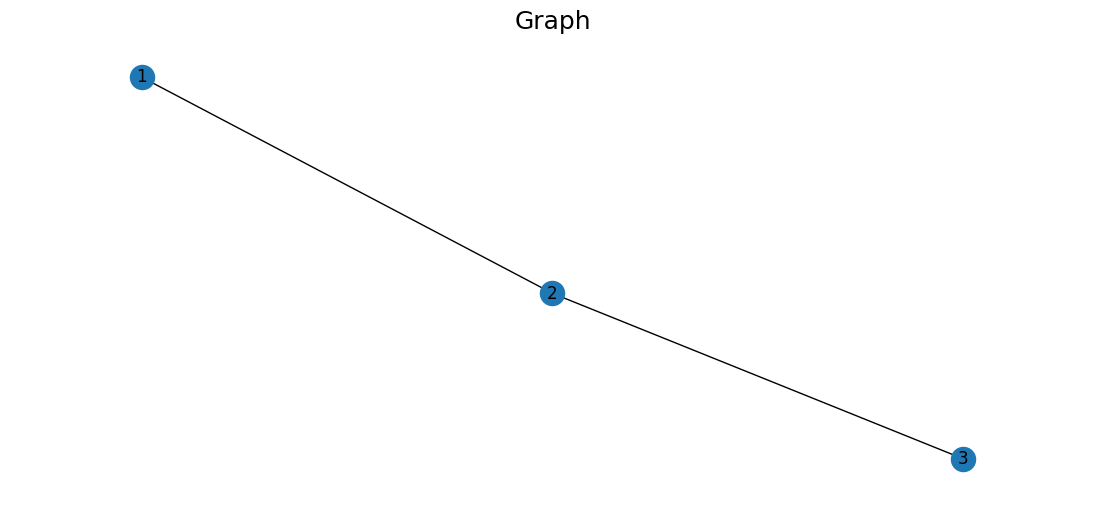

In [4]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(2, 3)

# Draw the graph
nx.draw_networkx(G, with_labels=True)
plt.title('Graph')
plt.show()


## Multigraph

Vertices joined to themselves are called loops and multiple edges to the same pair of vertices are called skeins. Considering them would result in a class of graphs called **multigraph** (skeins and no loops) and **pseudograph** (allowing both).

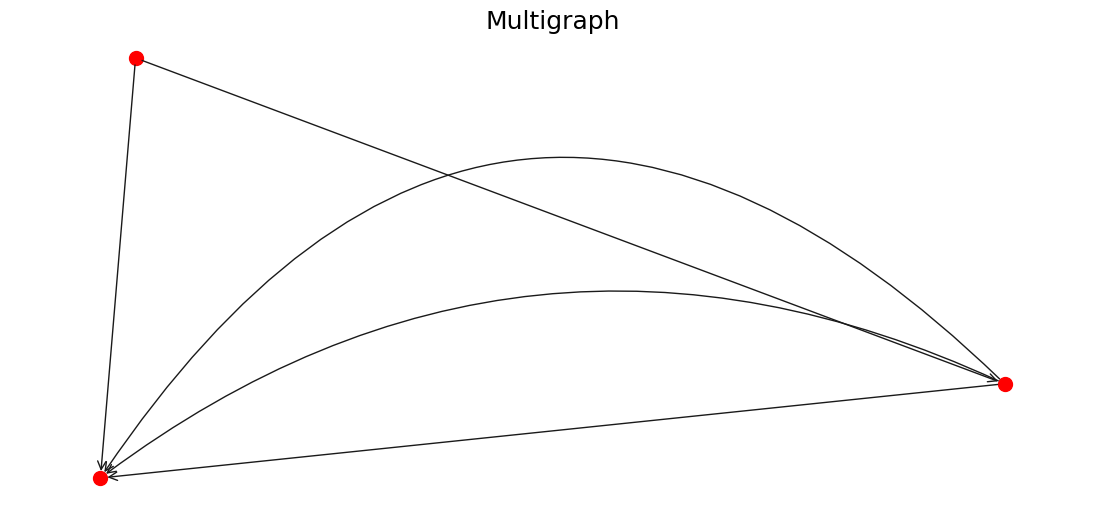

In [5]:
G=nx.MultiGraph ([(1,2),(1,2),(2,1),(3,1),(3,2),(3,3)])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.1",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.title('Multigraph')
plt.show()

## Pseudoraph

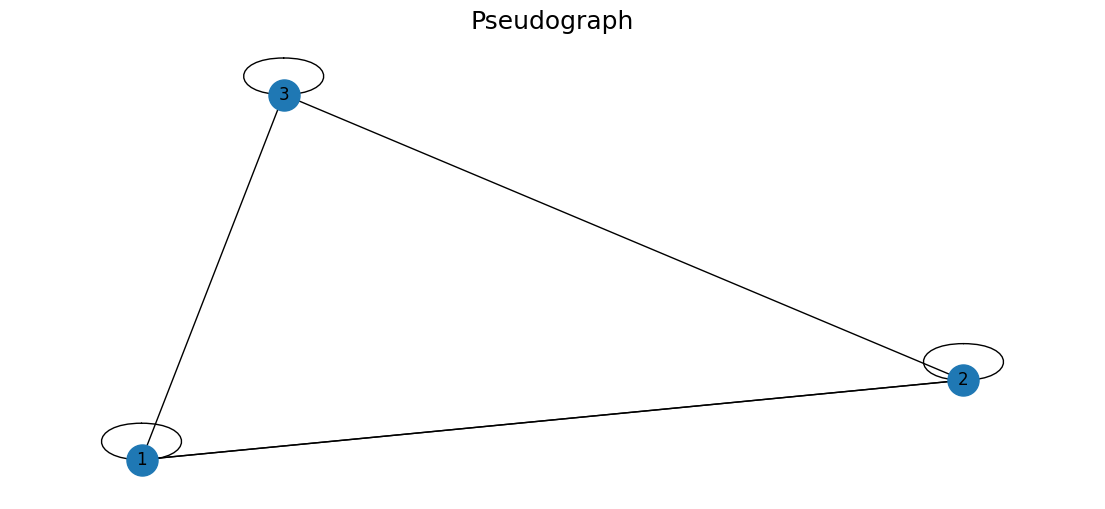

In [6]:
# Create a pseudograph object
G = nx.MultiGraph()

# Add nodes to the pseudograph
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges to the pseudograph
G.add_edge(1, 2)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(1, 1)
G.add_edge(2, 2)
G.add_edge(3, 3)
# Draw the pseudograph with self-loops
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Pseudograph')
plt.show()


## Digraph

When the edges are directed, its called **digraph**.

## Null graph

When there are no edges or set $e = \{\}$ then it is called a **null graph**.

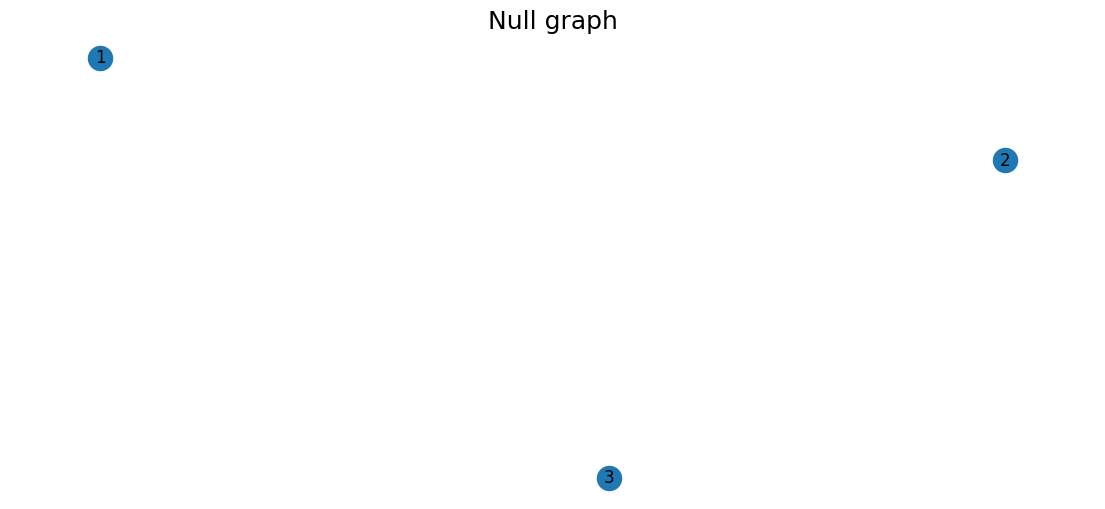

In [7]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)


# Draw the graph
nx.draw_networkx(G, with_labels=True)
plt.title('Null graph')
plt.show()

## Complete graph

When the graph has all possible edges, it is called as **complete graph**.

Text(0.5, 1.0, 'Complete graph')

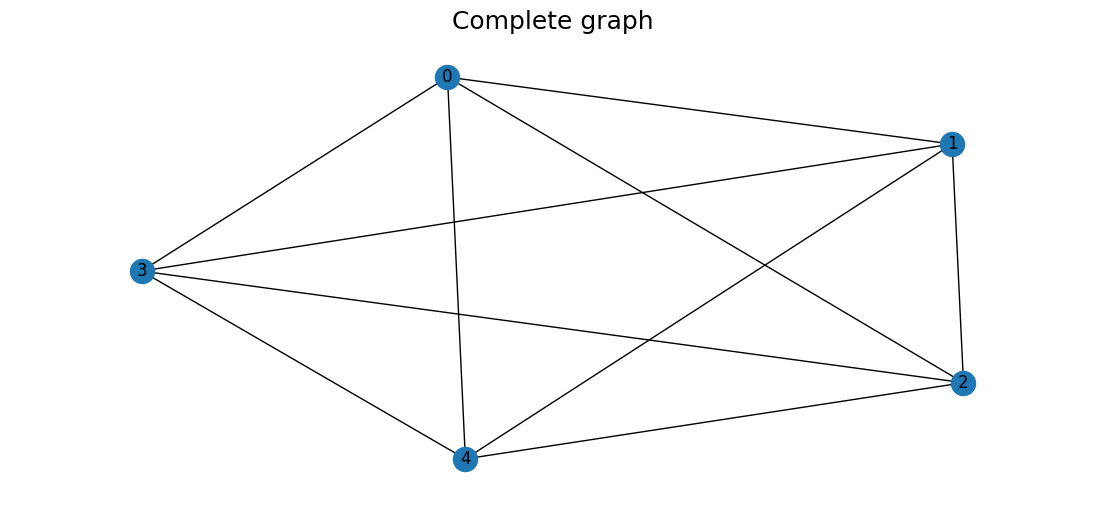

In [8]:
G = nx.complete_graph(5)
nx.draw_networkx(G)
plt.title('Complete graph')

## Utility graph

The **utility graph**, is the graph having vertex set $\{A, B, C, X, Y, Z\}$ and edge set $\{\{A, X\}, \{A, Y\}, \{A, Z\}, \{B, X\}, \{B, Y\}, \{B, Z\} \{C, X\}, \{C, Y\}, \{C, Z\}\}$

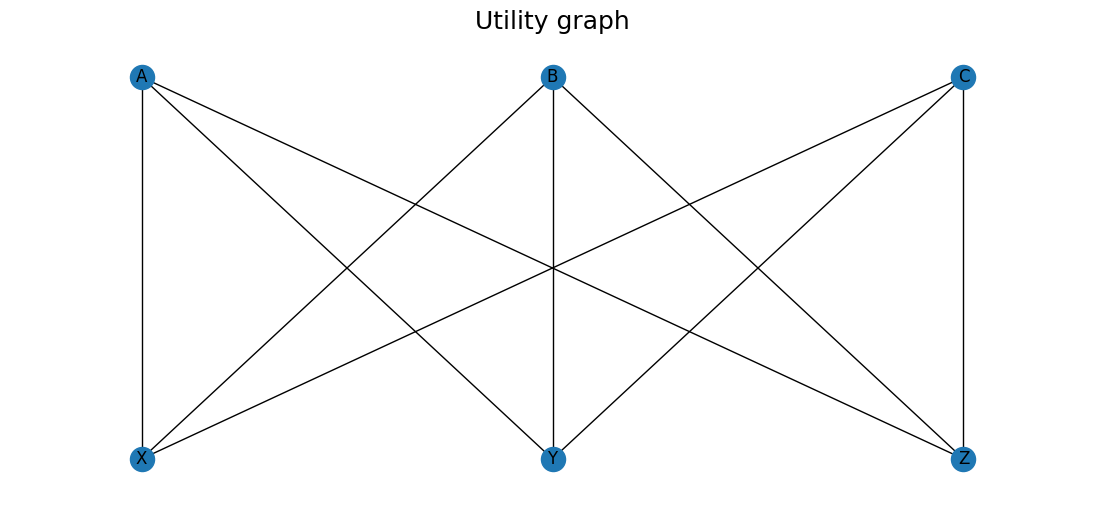

In [9]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(["A", "B", "C", "X", "Y", "Z"])

# Add edges to the graph
G.add_edges_from([("A", "X"), ("A", "Y"), ("A", "Z"),
                  ("B", "X"), ("B", "Y"), ("B", "Z"),
                  ("C", "X"), ("C", "Y"), ("C", "Z")])

# Set the position of the nodes
pos = {
    "A": (0, 1),
    "B": (1, 1),
    "C": (2, 1),
    "X": (0, 0),
    "Y": (1, 0),
    "Z": (2, 0),
}

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True)
plt.title('Utility graph')
# Show the graph
plt.show()


## Complement of a graph

The **complement** of a graph $G$ is $\overline{G}$ that has the edge set that are not present in the edge set of $G$.

Text(0.5, 1.0, 'Complement of graph')

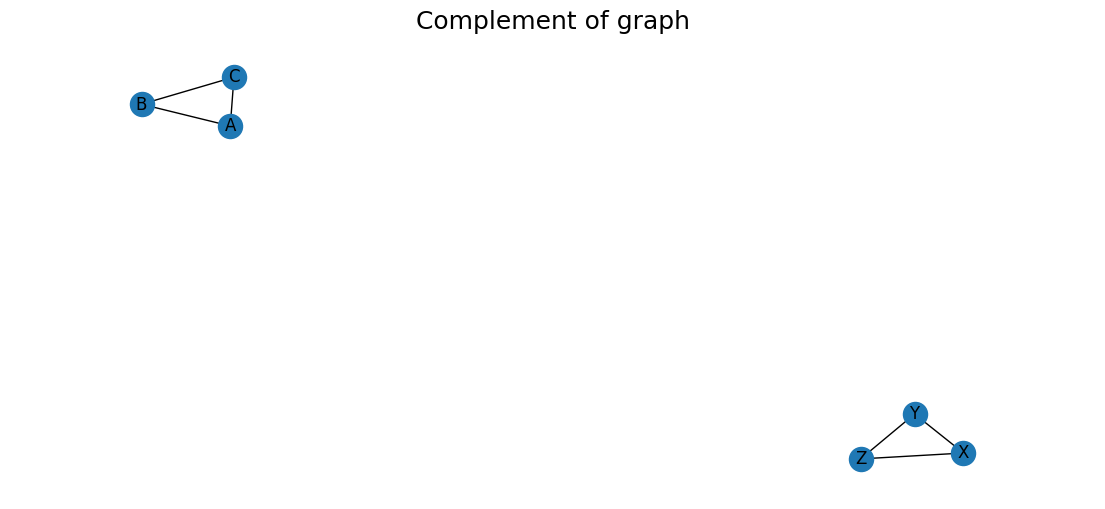

In [10]:
G_hat = nx.complement(G)
nx.draw_networkx(G_hat, with_labels=True)
plt.title('Complement of graph')

**Null graphs** and **complete graphs** are complementary. That is, for every positive integer $v$, $\overline{N_{v}}$ is equal to $K_{v}$ and $\overline{K_{v}}$ is equal to $N_{v}$.

## Subgraph

A graph $H$ is a **subgraph** of a graph $G$ if the vertex set of $H$ is a subset of the vertex set of $G$ and the edge set of $H$ is a subset of the edge set of $G$.

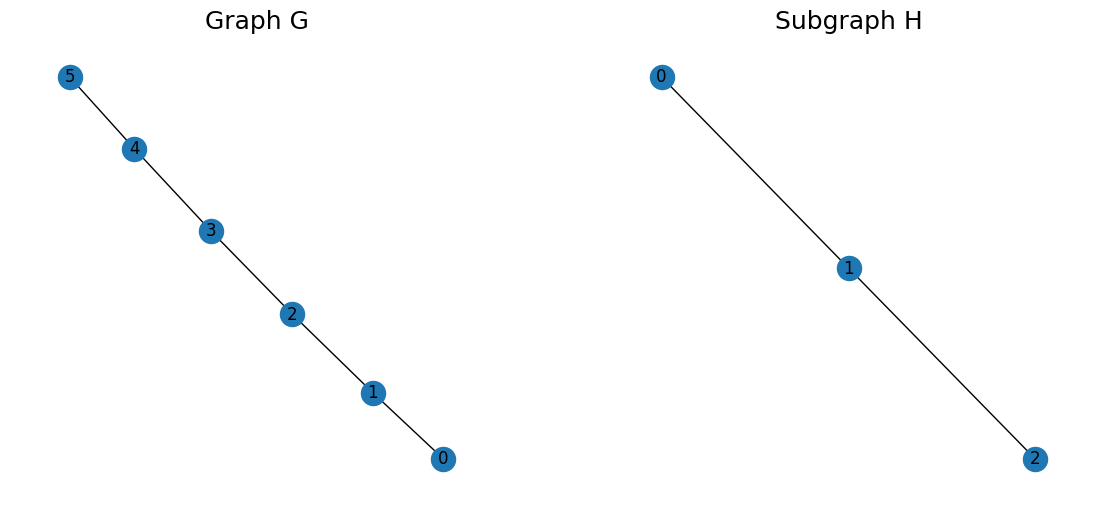

In [11]:
# Create graph G
G = nx.path_graph(6)

# Create subgraph H
H = G.subgraph([0, 1, 2])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Draw G on the first subplot
nx.draw_networkx(G, ax=ax1)
ax1.set_title("Graph G")

# Draw H on the second subplot
nx.draw_networkx(H, ax=ax2)
ax2.set_title("Subgraph H")

# Show the figure
plt.show()

## Isomorphic graphs

Two graphs are said to be **isomorphic** if there exists between their vertex sets a one-to-one correspondence having the property that whenever two vertices are adjacent in either graph, the corresponding two vertices are adjacent in the other graph. Such a one-to-one correspondence is called an **isomorphism** (from Greek roots meaning *“same structure”*). If $G$ and $H$ are isomorphic graphs we denote this by writing “$G$ ≅ $H$”.

The **degree** of a vertex is the number of incidents to it.

Properties preserved by isomorphism:

1) The number of vertices.

2) The number of edges.

3) The distribution of degrees.

4) The number of pieces in it.

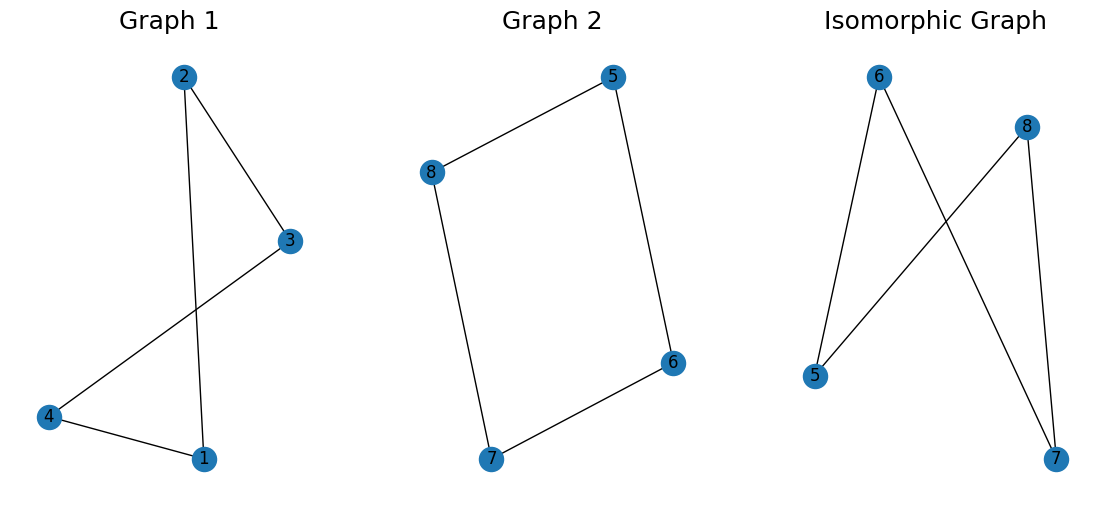

True

In [12]:
import networkx.algorithms.isomorphism as iso

# Create the first graph
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4])
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Create the second graph
G2 = nx.Graph()
G2.add_nodes_from([5, 6, 7, 8])
G2.add_edges_from([(5, 6), (6, 7), (7, 8), (8, 5)])

# Define a mapping between the nodes of G1 and G2
mapping = {1: 5, 2: 6, 3: 7, 4: 8}

# Create the isomorphic graph
G3 = nx.relabel_nodes(G1, mapping)

# Draw the graphs
fig, axs = plt.subplots(1, 3)
nx.draw_networkx(G1, ax=axs[0])
nx.draw_networkx(G2, ax=axs[1])
nx.draw_networkx(G3, ax=axs[2])
axs[0].set_title("Graph 1")
axs[1].set_title("Graph 2")
axs[2].set_title("Isomorphic Graph")
plt.show()
nx.is_isomorphic(G1, G2)  # no weights considered


## Planar graph

A graph is **planar** if it is isomorphic to a graph that has been drawn in a plane without edge-crossings. Otherwise a graph is **nonplanar**.

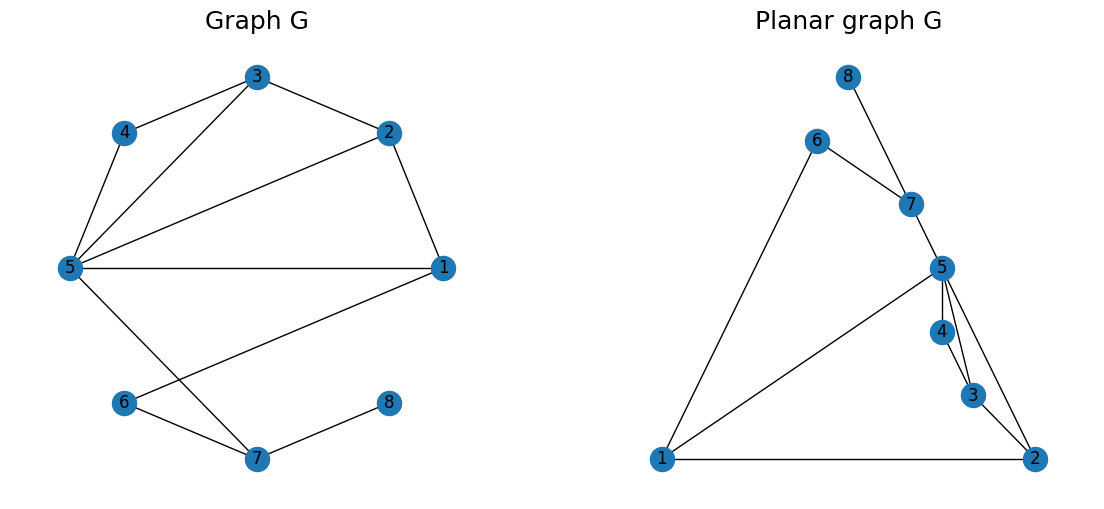

In [13]:
# Create a graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (1, 5), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5), (5, 7), (6, 7), (7, 8)])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2)

pos = nx.circular_layout(G)
nx.draw_networkx(G, pos,with_labels=True, ax=ax1)
ax1.set_title("Graph G")

# Draw the planar graph
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, ax=ax2)
ax2.set_title("Planar graph G")

plt.show()

## Jordan curve theorem

A **continuous curve** is closed if the starting point and ending point are the same.And a continuous closed curve is **simple** if no point other than the starting point is repeated, and the starting point itself is repeated only once.

The **Jordan Curve Theorem** says that any such thing embedded in a plane cuts the plane into two regions—the inside and the outside—and that any unbroken curve drawn in the plane from a point inside to a point outside must somewhere cross the rubber band. The corollary says that if two points on the rubber band are joined by an unbroken curve in the plane that doesn’t touch the rubber band anywhere else, then that unbroken curve must be either entirely inside the rubber band or entirely outside it.

`````{tip}
In mathematics, the **pigeonhole** principle states that if n items are put into m containers, with n > m, then at least one container must contain more than one item.
`````

1. $UG$ (Utility graph) and $K_5$ (complete graph) are non-planar.
2. Any subgraph of a planar graph is planar.
3. If a graph $H$ is a subgraph of a graph $G$, we will also say that G is a **supergraph** of H.

If some new vertices of degree 2 are added to some of the edges of a graph $G$, the resulting graph $H$ is called an **expansion** of $G$.

4. Every expansion of $UG$ or $K_5$ is nonplanar.
5. Every supergraph of an expansion of $UG$ or $K_5$ is nonplanar.

## Kuratowski's theorem

**Kuratowski’s Theorem**: Every nonplanar graph is a supergraph of an expansion of $UG$ or $K_5$.

6. The set of all **nonplanar graphs** is equal to the set of all graphs that are supergraphs of expansions of $UG$ or $K_5$.
7. The set of all **planar graphs** is equal to the set of all graphs that are not supergraphs of expansions of $UG$ or $K_5$.

## Euler's formula

1. A walk in a graph is a sequence $A_1$ $A_2$ $A_3$ ... An of not necessarily distinct vertices in which $A_1$ is joined by an edge to $A_2$, $A_2$ is joined by an edge to $A_3$, ..., and $A_n$ − 1 is joined by an edge to $A_n$. The walk $A_1$ $A_2$ $A_3$ ... $A_n$ is said to join $A_1$ and $A_n$.
2. Any sequence of distinct vertices in $K_v$ is a walk.
3. A null graph $N_v$ has no walks.
4. A graph is said to be **connected** if every pair of vertices is joined by a walk. Otherwise a graph is said to be **disconnected**.
5. Every **cyclic graph** is connected, as is every complete graph.
6. Except for $N_1$, all null graphs are disconnected.

### Faces of a graph

7. When a planar graph is actually drawn in a plane without edge-crossings, it cuts the plane into regions called faces of the graph. The letter $“f”$ shall denote the number of faces of a planar graph.

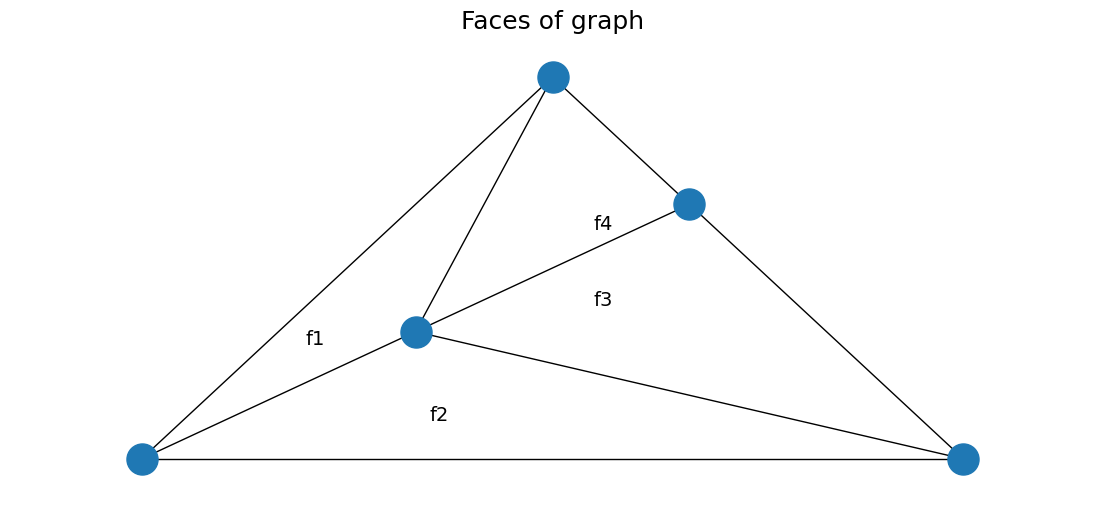

In [14]:
# Create a graph with 5 nodes and 8 edges
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,5), (2,5), (3,5), (4,5)])

# Get node positions for a planar layout
pos = nx.planar_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Add the face labels
plt.text(-0.6, -0.1, 'f1', fontsize=14)
plt.text(-0.3, -0.3, 'f2', fontsize=14)
plt.text(0.1, 0.001, 'f3', fontsize=14)
plt.text(0.1, 0.2, 'f4', fontsize=14)

# Show the plot
plt.title('Faces of graph')
plt.show()


8. A graph is **polygonal** if it is planar, connected, and has the property that every edge borders on two different faces.

### Euler's formula

**Euler’s Formula says that for planar connected graphs $v$ + $f$ − $e$ is constant, and the constant is 2**

## Topology

**Topology** is a purely qualitative subject where quantity is banned. In it two figures are always equivalent if it is possible to pass from one to the other by a continuous deformation, whose mathematical law can be of any sort whatsoever as long as continuity is respected.

## Regular graphs

A graph is **regular** if all the vertices have the same degree. If the common value of the degrees of a regular graph is the number $d$, we say that the graph is regular of degree $d$.

1. Any cyclic graph $C_v$ is regular of degree 2.
2. Any complete graph $K_v$ is regular of degree $v$ − 1.
3. Any null graph $N_v$ is regular of degree 0.
4. $UG$ is regular of degree 3.

## Platonic graphs

A graph is **platonic** if it is polygonal, regular, and has the additional property that all of its faces are bounded by the same number of edges.
Other than $K_1$ and the cyclic graphs there are only **five** platonic graphs. The five Platonic solids: tetrahedron, cube, octahedron, dodecahedron, and icosahedron.

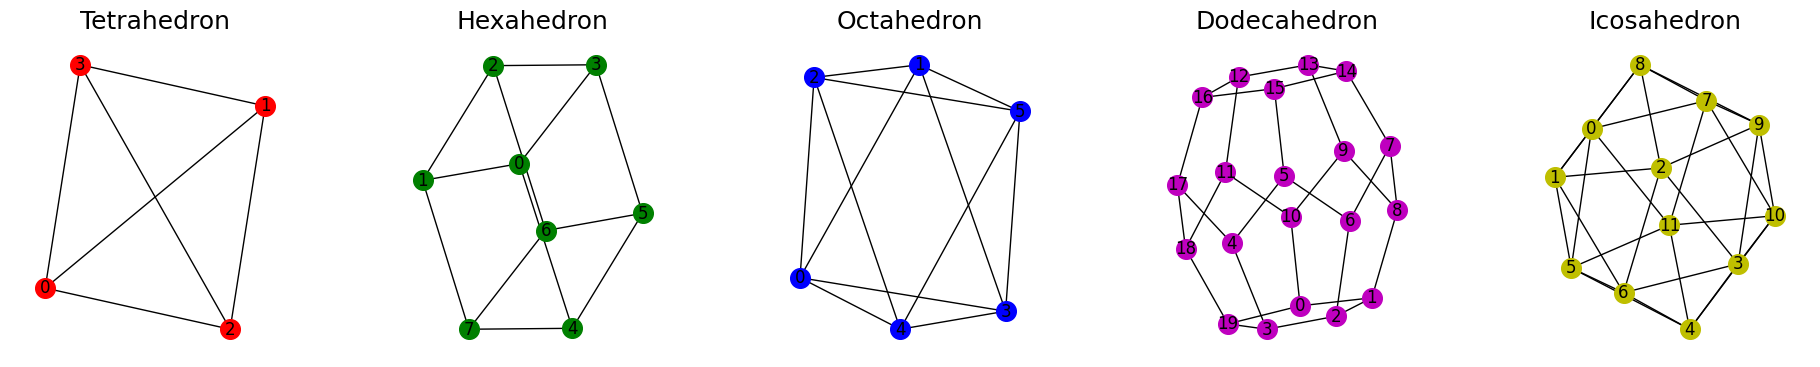

In [15]:
# Create the five platonic solids as graphs
tetrahedron = nx.tetrahedral_graph()
hexahedron = nx.cubical_graph()
octahedron = nx.octahedral_graph()
dodecahedron = nx.dodecahedral_graph()
icosahedron = nx.icosahedral_graph()

# Set the figure size and create a figure with 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Draw each platonic solid graph in a subplot
nx.draw_networkx(tetrahedron, ax=axs[0], node_size=200, node_color='r')
axs[0].set_title("Tetrahedron")

nx.draw_networkx(hexahedron, ax=axs[1], node_size=200, node_color='g')
axs[1].set_title("Hexahedron")

nx.draw_networkx(octahedron, ax=axs[2], node_size=200, node_color='b')
axs[2].set_title("Octahedron")

nx.draw_networkx(dodecahedron, ax=axs[3], node_size=200, node_color='m')
axs[3].set_title("Dodecahedron")

nx.draw_networkx(icosahedron, ax=axs[4], node_size=200, node_color='y')
axs[4].set_title("Icosahedron")

# Adjust the subplots' positions and spacing
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.3)

# Show the figure
plt.show()


## Dual graph

Select a point within each face of $G$ and let two such points be connected by a line whenever the corresponding faces of $G$ share a border. This system of points and lines constitutes a graph, called a **dual graph** of $G$, which is always planar and connected.

## Euler walk

A walk $A_1$, $A_2$ ... $A_{n−1}$, $A_n$ in a graph is closed if $A_1$ and $A_n$ are the same vertex; otherwise the walk is open. 

An **euler walk** is a walk that uses every edge in the graph exactly once.

If a connected graph has a closed euler walk, then every vertex is even. Conversely, if a graph is connected and every vertex is even (A vertex is “even” if its degree is an even number), then it has a closed euler walk.

1. If a particular vertex is selected from a connected graph having every vertex even, then it is possible to find a closed euler walk beginning and ending at that particular vertex.
2. If a connected graph has an open euler walk then it has exactly two odd vertices. Conversely, if a connected graph has exactly two odd vertices then it has an open euler walk.
3. If a connected graph has an open euler walk, then the open euler walk must begin at one of the odd vertices and end at the other.

Graph has an Eulerian path
Eulerian path: [(1, 4), (4, 3), (3, 2), (2, 1)]


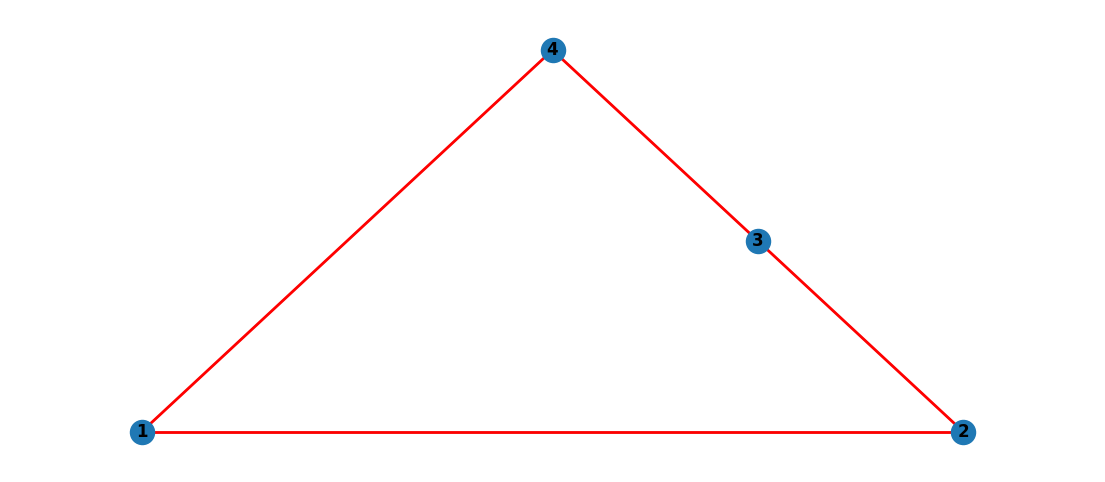

In [16]:
# Define a graph with an Eulerian path
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,1)])

# Check if the graph has an Eulerian path
if nx.is_eulerian(G):
    print("Graph has an Eulerian path")
else:
    print("Graph does not have an Eulerian path")

# Find an Eulerian path in the graph
path = list(nx.eulerian_circuit(G))

# Print the Eulerian path
print("Eulerian path:", path)

# Draw the graph with the Eulerian path highlighted
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=path, edge_color='r', width=2)
plt.show()


## Hamilton walk

An open **hamilton walk** is a walk that uses every vertex in the graph exactly once. A closed hamilton walk is a closed walk that uses the initial vertex exactly twice and all the other vertices in the graph.

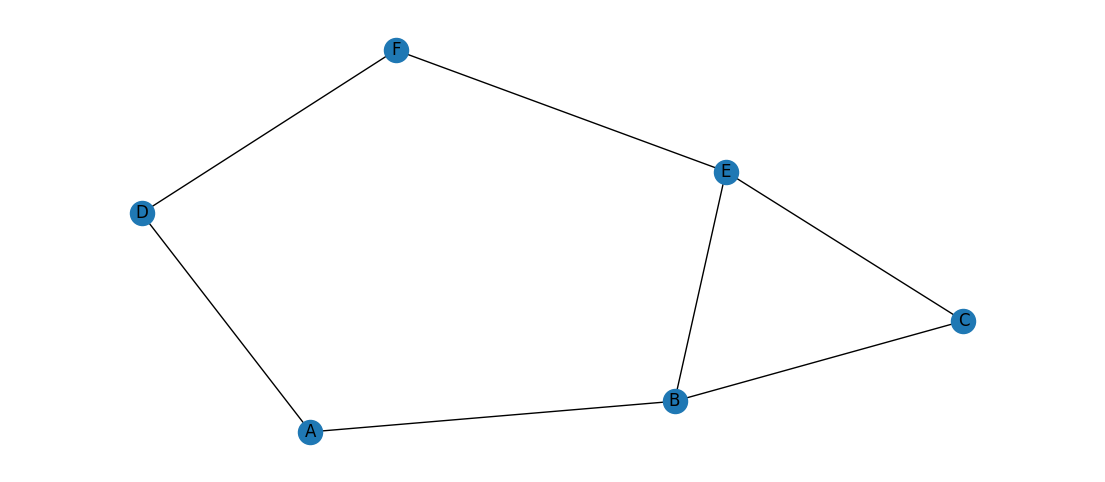

Hamiltonian walk:  [['A', 'B', 'C', 'E', 'F', 'D']]


In [17]:
# Create a graph
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'E'), ('E', 'F'), ('F', 'D'), ('D', 'A'), ('B', 'E')])

# plot
nx.draw_networkx(G)
plt.show()

# Find all simple paths in the graph
paths = nx.all_simple_paths(G, 'A', 'D')

# Filter for paths that visit all nodes
hamiltonian_paths = [path for path in paths if set(path) == set(G.nodes)]

# Print the Hamiltonian paths
print('Hamiltonian walk: ',hamiltonian_paths)


## Modeling choice

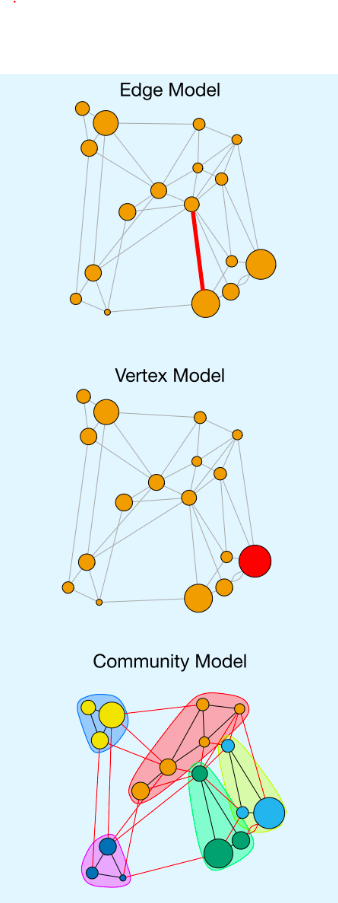

### Adjacency matrix

In [18]:
n_nodes = 5

A = np.zeros((n_nodes, n_nodes))  # initialize to a graph with no edges

A[0, 1] = 1  # from node 0 to node 1
A[1, 2] = 1  # from node 1 to node 2...
A[1, 4] = 1  # etc, etc.
A[2, 1] = 1
A[2, 3] = 1
A[4, 1] = 1

A

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Networkx to adj matrix

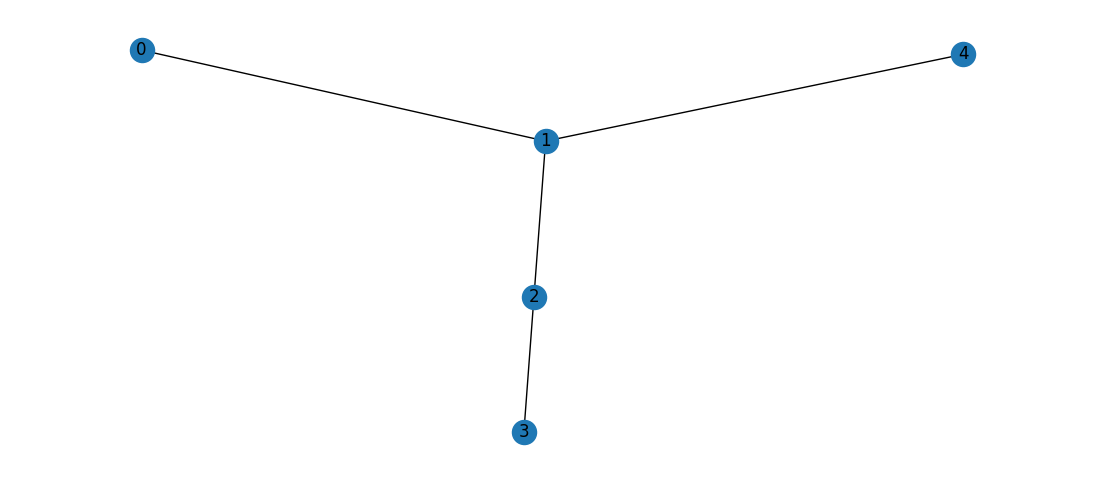

In [19]:
g = nx.Graph()

g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(1, 4)
g.add_edge(2, 1)
g.add_edge(2, 3)

nx.draw_networkx(g)

In [20]:
nx.to_numpy_array(g, nodelist=[0, 1, 2, 3, 4])

array([[0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
nx.to_numpy_array(g, nodelist=[2, 1, 0, 3, 4])

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Plotting 

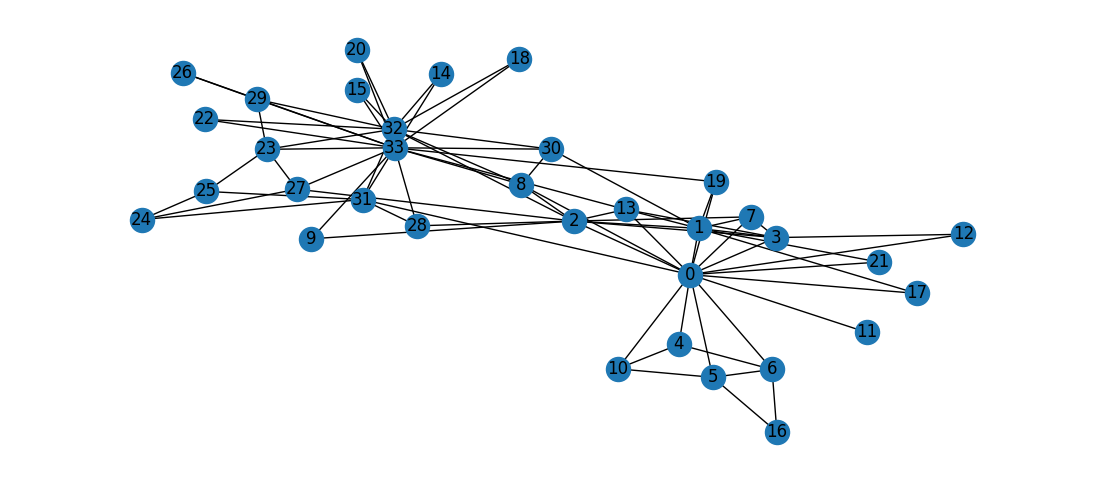

In [22]:
g = nx.karate_club_graph()
nx.draw_networkx(g)

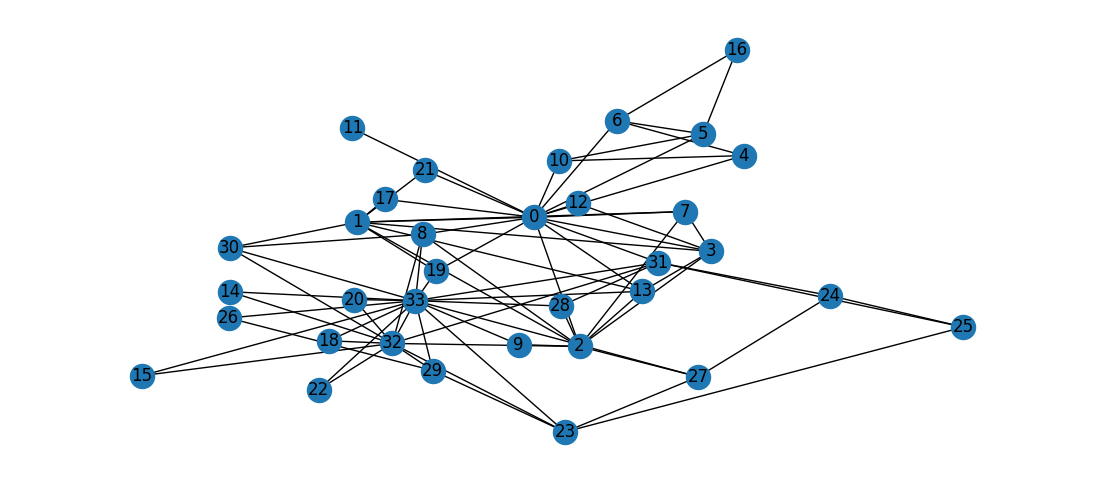

In [23]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)

In [24]:
nodelist = list(g.nodes)

A = nx.to_numpy_array(g, nodelist=nodelist)

A

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

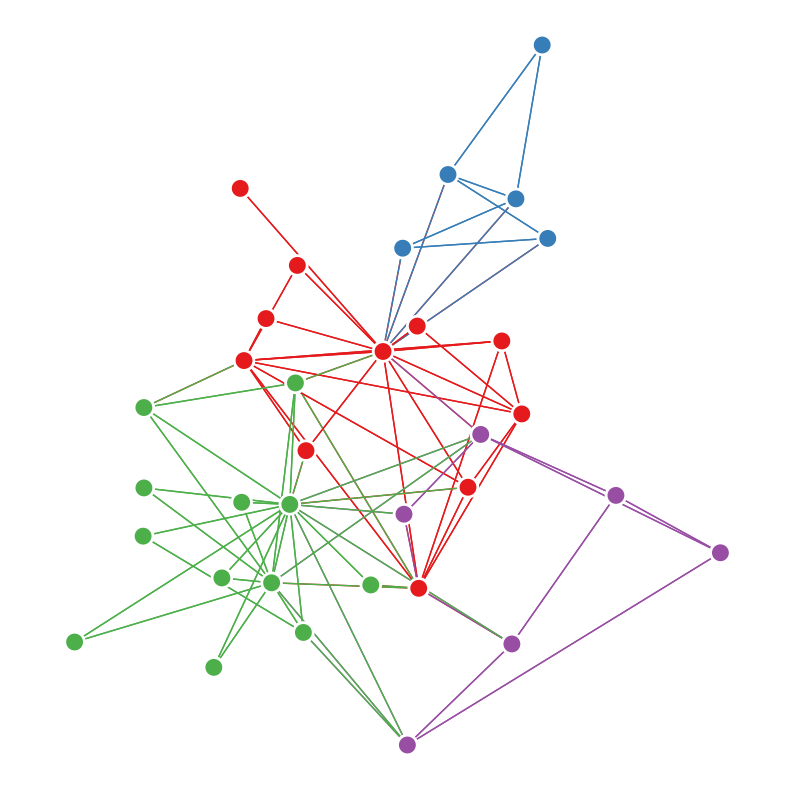

In [25]:
xs = []
ys = []
for node in nodelist:
    xs.append(pos[node][0])
    ys.append(pos[node][1])
xs = np.array(xs)
ys = np.array(ys)

A = nx.to_numpy_array(g, nodelist=nodelist)
partition_map = leiden(g, trials=100)
labels = np.vectorize(partition_map.get)(nodelist)

ax = networkplot(
    A,
    x=xs,
    y=ys,
    node_alpha=1.0,
    edge_alpha=1.0,
    edge_linewidth=1.0,
    node_hue=labels,
    node_kws=dict(s=200, linewidth=2),
)
_ = ax.axis('off')

<Axes: >

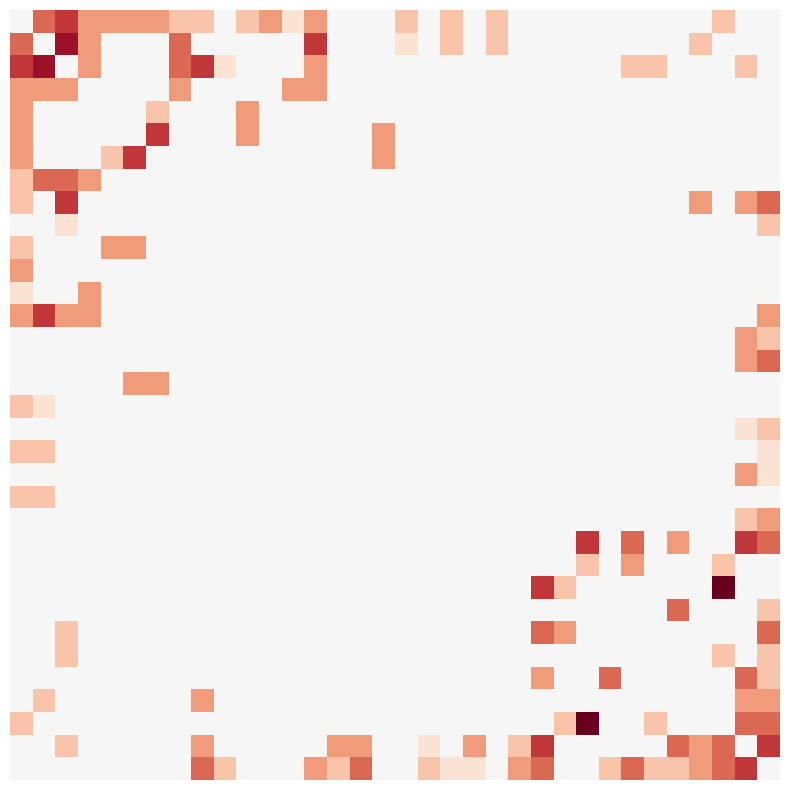

In [26]:
heatmap(A, cbar=False)

<Axes: >

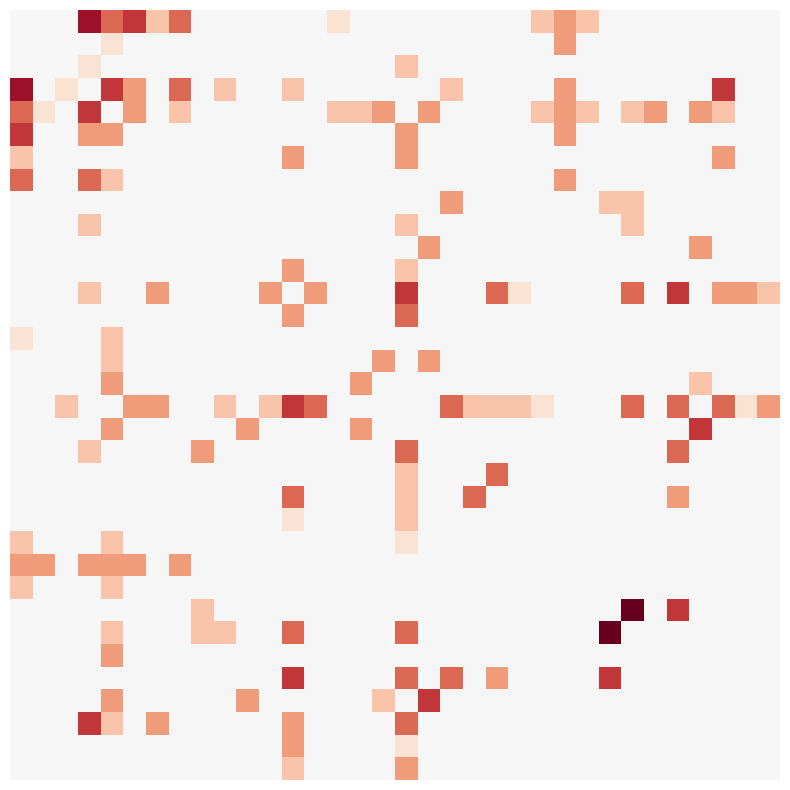

In [27]:
rng = np.random.default_rng(8888)

n = len(A)  # n is the number of nodes
perm = rng.permutation(n)

A_perm = A[perm][:, perm]

heatmap(A_perm, cbar=False)

In [28]:
partition_map = leiden(g, trials=100)

labels = np.vectorize(partition_map.get)(nodelist)

labels

array([1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2])

<Axes: >

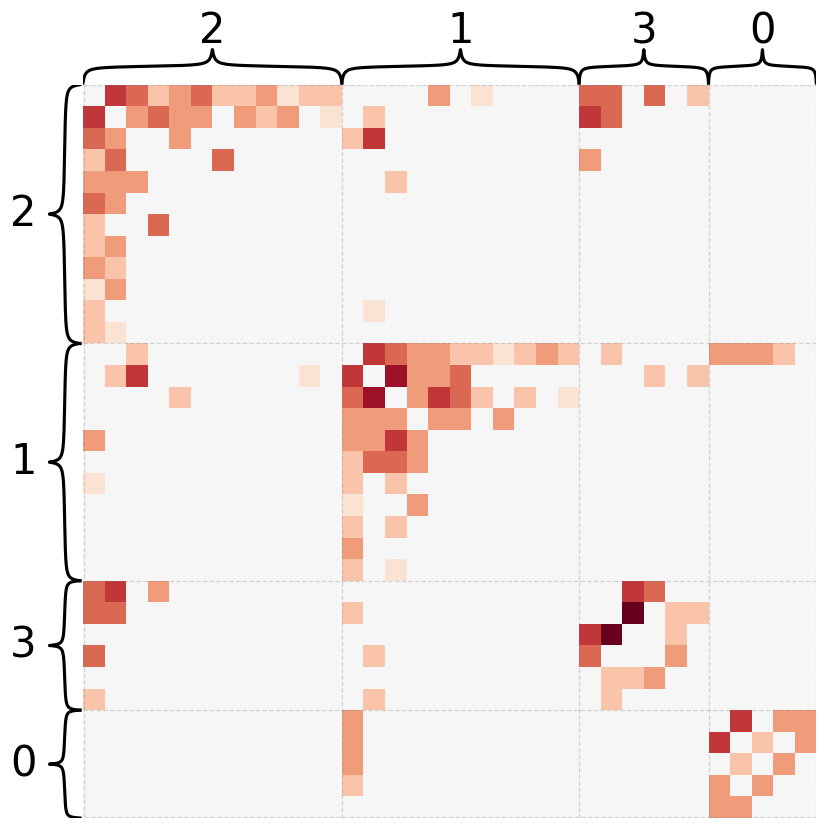

In [29]:
heatmap(A, inner_hier_labels=labels, sort_nodes=True, cbar=False)

In [30]:
is_fully_connected(A)

True

In [31]:
g.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [32]:
A = load_drosophila_left()[:28, :28]
A = binarize(A).astype(int)
g = nx.from_numpy_array(A, create_using=nx.DiGraph)

def map_to_nodes(node_map):
    node_map.setdefault(0)
    # utility function to make it easy to compare dicts to array outputs
    return np.array(np.vectorize(lambda x: node_map.setdefault(x, 0))(nodelist))

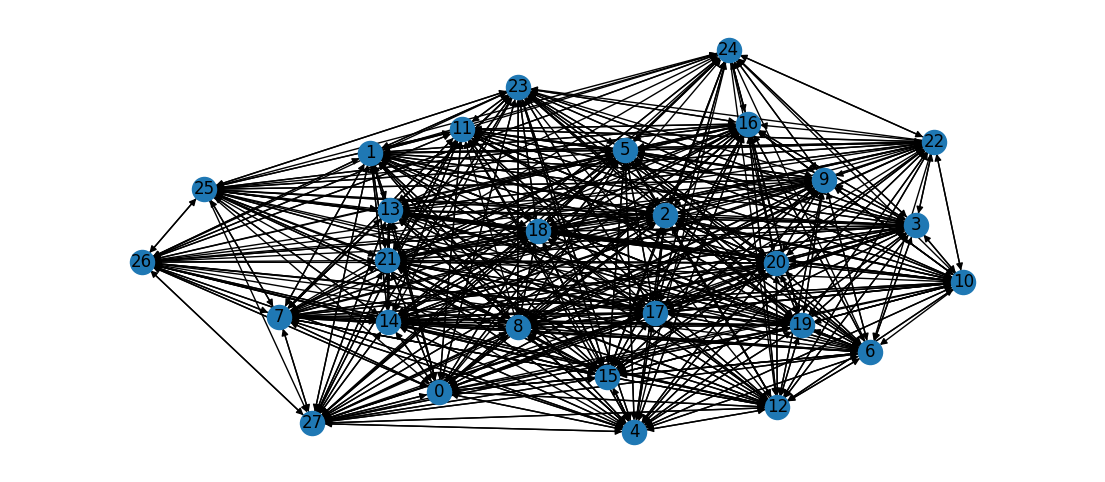

In [33]:
nx.draw_networkx(g)

In [34]:
g.out_degree()

OutDegreeView({0: 24, 1: 26, 2: 26, 3: 26, 4: 25, 5: 25, 6: 24, 7: 26, 8: 26, 9: 23, 10: 25, 11: 25, 12: 24, 13: 23, 14: 25, 15: 26, 16: 23, 17: 23, 18: 24, 19: 25, 20: 26, 21: 25, 22: 22, 23: 24, 24: 17, 25: 22, 26: 18, 27: 21})

In [35]:
g.in_degree()

InDegreeView({0: 25, 1: 24, 2: 25, 3: 26, 4: 27, 5: 27, 6: 23, 7: 23, 8: 23, 9: 24, 10: 21, 11: 23, 12: 26, 13: 23, 14: 27, 15: 25, 16: 27, 17: 23, 18: 25, 19: 27, 20: 24, 21: 25, 22: 20, 23: 23, 24: 17, 25: 19, 26: 20, 27: 27})

## centrality

In [36]:
g = nx.karate_club_graph()

### eigenvector centrality

In [37]:
map_to_nodes(dict(nx.eigenvector_centrality(g)))

array([0.35548349, 0.26595387, 0.31718939, 0.21117408, 0.07596646,
       0.07948058, 0.07948058, 0.17095511, 0.22740509, 0.10267519,
       0.07596646, 0.05285417, 0.08425192, 0.2264697 , 0.10140628,
       0.10140628, 0.02363479, 0.09239676, 0.10140628, 0.14791134,
       0.10140628, 0.09239676, 0.10140628, 0.15012329, 0.05705374,
       0.0592082 , 0.07558192, 0.13347933, 0.13107926, 0.13496529,
       0.17476028, 0.19103627, 0.30865105, 0.37337121])

### page rank

In [38]:
pagerank_dict = nx.pagerank(g, max_iter=100)
np.vectorize(pagerank_dict.get)(nodelist)

array([0.08850807, 0.05741484, 0.06276686, 0.03721208, 0.02050398,
       0.03381044, 0.03152901, 0.02646462, 0.03338156, 0.00946322,
       0.02068902, 0.00978569, 0.01147487, 0.03347419, 0.0129416 ,
       0.01637633, 0.0167554 , 0.00967727, 0.00954486, 0.01307752,
       0.01122424, 0.01136015, 0.0129606 , 0.04114597, 0.01663437,
       0.02867296, 0.01524039, 0.02723536, 0.01447852, 0.02827181,
       0.02303184, 0.04198549, 0.07592644, 0.09698042])

### Betweeness centrality

In [39]:
map_to_nodes(nx.betweenness_centrality(g))

array([0.43763528, 0.05393669, 0.14365681, 0.01190927, 0.00063131,
       0.02998737, 0.02998737, 0.        , 0.05592683, 0.00084776,
       0.00063131, 0.        , 0.        , 0.0458634 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03247505,
       0.        , 0.        , 0.        , 0.01761364, 0.0022096 ,
       0.00384049, 0.        , 0.02233345, 0.00179473, 0.00292208,
       0.01441198, 0.13827561, 0.14524711, 0.30407498])

## Data

In [9]:
# load kpi data from both dev and prod env
stl_dev = pd.read_csv('curve_kpis_stl1_dev.csv',sep=';')
stl_prod = pd.read_csv('curve_kpis_stl1_prod.csv',sep=';')

In [10]:
# get the date without time
stl_dev['date_nt'] = stl_dev['date'].str[:10]
stl_prod['date_nt'] = stl_prod['date'].str[:10]

In [11]:
# create a new column with train and obm color 
stl_dev['train_obm'] = stl_dev['train_id'].astype(str) +'_' + stl_dev["obm_color"]
stl_prod['train_obm'] = stl_prod['train_id'].astype(str) +'_' + stl_prod["obm_color"]

In [55]:
stl_prod.columns

Index(['curve_id', 'primary_mac_address', 'train_id', 'obm_direction', 'date',
       'secondary_mac_address', 'secondary_connection', 'start_time',
       'end_time', 'track_id', 'tre_id', 'ap_color', 'crssi_peak', 'crssi_min',
       'crssi_avg', 'kp_min', 'kp_max', 'speed_avg', 'curve_length', 'ho_diff',
       'ho_duration', 'ho_reason', 'kp_inc', 'ping_pong', 'per_curve',
       'packet_loss_cnt', 'obm_color', 'ap_kp_in_track', 'hi1', 'hi2',
       'hi2_ant1', 'hi2_ant2', 'ap_name_geo', 'tre_ap_name', 'is_sim_flag',
       'date_nt', 'train_obm'],
      dtype='object')

In [98]:
# group by tre and train_obm to get the average of eah combination
bipartite_df = stl_dev.groupby(['tre_id','train_obm','date_nt']).agg({'packet_loss_cnt': 'sum'}).reset_index()

In [99]:
bipartite_df

,tre_id,train_obm,date_nt,packet_loss_cnt
0,AP01,103_BLUE,2022-08-10,0
1,AP01,103_BLUE,2023-01-16,0
2,AP01,107_BLUE,2022-08-02,0
3,AP01,107_BLUE,2023-01-06,0
4,AP01,111_BLUE,2022-12-19,0
...,...,...,...,...
9031,tre_00:14:5a:02:36:48,55_BLUE,2023-03-09,0
9032,tre_00:14:5a:02:36:48,79_RED,2023-03-09,1
9033,tre_00:14:5a:02:36:48,83_BLUE,2023-03-16,0
9034,tre_00:14:5a:02:36:48,87_BLUE,2022-09-29,0


In [ ]:
# write a sample code to use pandas group by and aggregate functions on multiple columns

In [ ]:
bipartite_df['date_nt'].unique()

In [102]:
bp_df = bipartite_df[bipartite_df['date_nt'] == '2022-08-02']

array(['2022-08-10', '2023-01-16', '2022-08-02', '2023-01-06',
       '2022-12-19', '2022-11-09', '2022-06-21', '2023-01-20',
       '2022-10-26', '2022-12-08', '2022-06-16', '2023-01-24',
       '2022-08-16', '2023-01-10', '2022-09-14', '2022-10-11',
       '2022-12-06', '2022-09-08', '2023-05-05', '2023-01-03',
       '2023-02-21', '2022-10-29', '2023-01-28', '2023-03-06',
       '2022-08-24', '2022-10-27', '2022-06-08', '2023-03-16',
       '2022-09-29', '2022-05-24', '2023-03-09', '2022-12-02',
       '2022-12-13', '2022-06-01', '2022-09-06', '2023-02-05',
       '2022-03-11', '2022-05-15'], dtype=object)

In [92]:
k.packet_loss_cnt.value_counts()

packet_loss_cnt
0    167
1    119
2     47
3     10
4      2
Name: count, dtype: int64

In [73]:
k.set_index('tre_id',inplace=True)

In [81]:
list(zip(k[['tre_id','train_obm']]))

[('tre_id',), ('train_obm',)]

In [82]:
k[['tre_id', 'train_obm']].apply(tuple, axis=1)

0                        (AP01, 103_BLUE)
36                       (AP02, 103_BLUE)
91                       (AP03, 103_BLUE)
93                        (AP03, 103_RED)
102                      (AP03, 115_BLUE)
                      ...                
8852    (tre_00:14:5a:02:33:ec, 115_BLUE)
8881     (tre_00:14:5a:02:33:ee, 103_RED)
8887     (tre_00:14:5a:02:33:ee, 115_RED)
8940    (tre_00:14:5a:02:35:b1, 103_BLUE)
8946    (tre_00:14:5a:02:35:b1, 115_BLUE)
Length: 289, dtype: object

In [ ]:
attrs = {0: {"attr1": 20, "attr2": "nothing"}, 1: {"attr2": 3}}
nx.set_node_attributes(G, attrs)

In [63]:
# add multiple weights for each edge to represent dynamic graphs and also add nodes
# Define your graph 'g' here
g = nx.Graph()
# Add nodes
g.add_node(1)
g.add_node(2)
g.add_node(3)
edge_weights = [1, 2, 3, 4, 5]  # Example weights for each edge
edge_list = list(g.edges())

# Create a new graph with dynamic weights
dynamic_g = nx.DiGraph()

# Add edges with multiple weights to the new graph
for edge, weight in zip(edge_list, edge_weights):
    u, v = edge
    dynamic_g.add_edge(u, v, weight=weight)

# Print the edges and their weights in the dynamic graph
for u, v, weight in dynamic_g.edges(data="weight"):
    print(f"Edge: ({u}, {v}), Weight: {weight}")


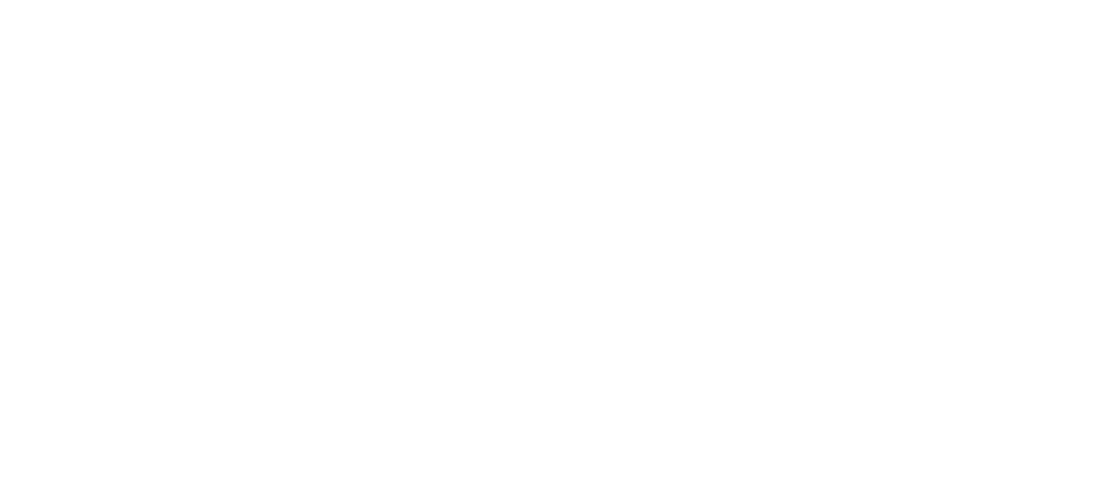

In [66]:
nx.draw_networkx(dynamic_g)

In [128]:
bp_graph = nx.Graph()
# Add nodes with the node attribute "bipartite"
bp_graph.add_nodes_from(bp_df['tre_id'], bipartite=0)
bp_graph.add_nodes_from(bp_df['train_obm'], bipartite=1)

In [129]:
nx_to_cyto

{'data': [],
 'directed': False,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'bipartite': 0,
     'id': 'AP01',
     'name': 'AP01',
     'label': 'AP01'}},
   {'data': {'bipartite': 0, 'id': 'AP02', 'value': 'AP02', 'name': 'AP02'}},
   {'data': {'bipartite': 0, 'id': 'AP03', 'value': 'AP03', 'name': 'AP03'}},
   {'data': {'bipartite': 0, 'id': 'AP05', 'value': 'AP05', 'name': 'AP05'}},
   {'data': {'bipartite': 0, 'id': 'AP06', 'value': 'AP06', 'name': 'AP06'}},
   {'data': {'bipartite': 0, 'id': 'AP07', 'value': 'AP07', 'name': 'AP07'}},
   {'data': {'bipartite': 0, 'id': 'AP08', 'value': 'AP08', 'name': 'AP08'}},
   {'data': {'bipartite': 0, 'id': 'AP09', 'value': 'AP09', 'name': 'AP09'}},
   {'data': {'bipartite': 0, 'id': 'AP10', 'value': 'AP10', 'name': 'AP10'}},
   {'data': {'bipartite': 0, 'id': 'AP11', 'value': 'AP11', 'name': 'AP11'}},
   {'data': {'bipartite': 0, 'id': 'AP12', 'value': 'AP12', 'name': 'AP12'}},
   {'data': {'bipartite': 0, 'id': 'AP13', 'value':

In [130]:
bp_graph.add_weighted_edges_from(
    [(row['tre_id'], row['train_obm'], row['packet_loss_cnt']) for idx, row in bp_df.iterrows()], 
    weight='weight')

In [131]:
pos = nx.drawing.layout.bipartite_layout(bp_graph,bp_graph.nodes)

## Dash application

In [132]:
from dash import Dash, html
import dash_cytoscape as cyto

In [133]:
app = Dash(__name__)

nx_to_cyto = nx.cytoscape_data(bp_graph)  
for n in nx_to_cyto["elements"]["nodes"]:
    for k, v in n.items():
        v["label"] = v.pop("value")
    position = pos[v['id']]
    n['position'] = {'x':position[1]*900,'y':v.pop("bipartite")*500}
    
nodes_edges = nx_to_cyto['elements']['nodes'].copy()
nodes_edges.extend(nx_to_cyto['elements']['edges'])


default_stylesheet = [
    {
        "selector": 'node',
        'style': {
            "opacity": 0.65,
        }
    },
    {
        "selector": 'edge',
        'style': {
            "curve-style": "bezier",
            "opacity": 0.65
        }
    },
]

app.layout = html.Div([
    dbc.Row
    cyto.Cytoscape(
        id='cytoscape-two-nodes',
        layout={'name': 'preset'},
        elements=nodes_edges,
        style={
            'height': '100vh',
            'width': '100%',
            'padding' : '0px 0px',
            'margin' : '0px 0px'
        },
        minZoom = 0.1,
        maxZoom = 2,
    )
])

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [14/May/2023 19:12:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 19:12:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2023 19:12:03] "GET /_dash-dependencies HTTP/1.1" 200 -


In [ ]:
# create a big bipartite graph and create a folded projection of it

In [126]:
# create a big bipartite graph and create a folded projection of it
import networkx as nx
from networkx.algorithms import bipartite

# Create a bipartite graph
G = nx.Graph()
nodes_1 = [1, 2, 3, 4, 5]
nodes_2 = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes_1, bipartite=0)
G.add_nodes_from(nodes_2, bipartite=1)
edges = [(1, 'A'), (1, 'B'), (2, 'C'), (2, 'D'), (3, 'A'), (3, 'B'), (4, 'C'), (5, 'E')]
G.add_edges_from(edges)

# Create a folded projection of the bipartite graph
top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
folded_projection = bipartite.projected_graph(G, top_nodes, multigraph=False)


# Display the folded projection
app = Dash(__name__)
nx_to_cyto = nx.cytoscape_data(folded_projection)

for n in nx_to_cyto["elements"]["nodes"]:
    for k, v in n.items():
        v["label"] = v.pop("value")
    position = pos[v['id']]
    n['position'] = {'x': position[1]*900, 'y': v.pop("bipartite")*500}

nodes_edges = nx_to_cyto['elements']['nodes'].copy()
nodes_edges.extend(nx_to_cyto['elements']['edges'])

app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-two-nodes',
        layout={'name': 'preset'},
        elements=nodes_edges,
        style={
            'height': '100vh',
            'width': '100%',
            'padding': '0px 0px',
            'margin': '0px 0px'
        },
        minZoom=0.1,
        maxZoom=2,
    )
])

if __name__ == '__main__':
    app.run_server(debug=False)


KeyError: 'tab'

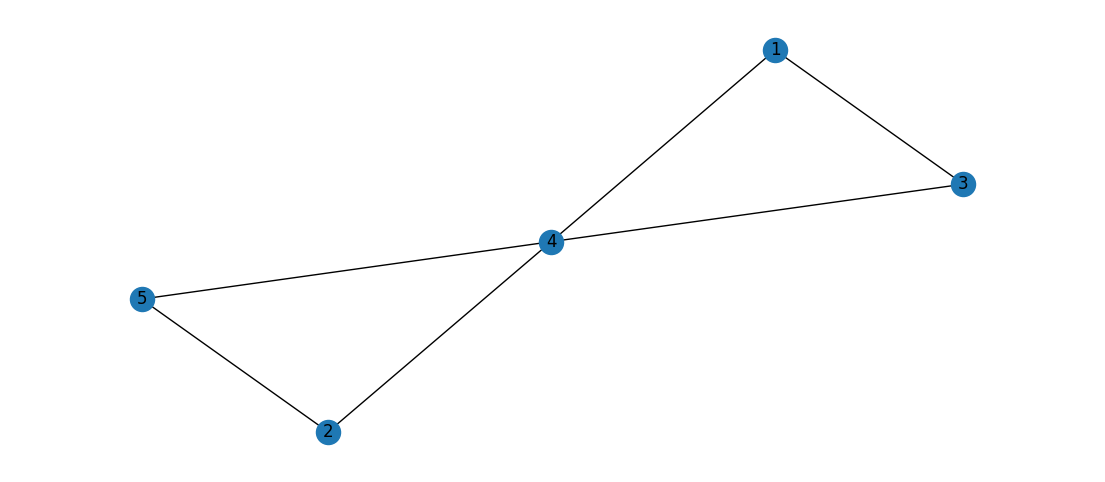

In [42]:
nx.draw_networkx(folded_projection)

In [46]:
folded_projection.

EdgeView([(1, 3), (1, 4), (2, 4), (2, 5), (3, 4), (4, 5)])

In [48]:
import json

import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

import dash_cytoscape as cyto
from demos import dash_reusable_components as drc

app = dash.Dash(__name__)
server = app.server

# ###################### DATA PREPROCESSING ######################
# Load data
with open('demos/data/sample_network.txt', 'r') as f:
    network_data = f.read().split('\n')

# We select the first 750 edges and associated nodes for an easier visualization
edges = network_data[:750]
nodes = set()

cy_edges = []
cy_nodes = []

for network_edge in edges:
    source, target = network_edge.split(" ")

    if source not in nodes:
        nodes.add(source)
        cy_nodes.append({"data": {"id": source, "label": "User #" + source[-5:]}})
    if target not in nodes:
        nodes.add(target)
        cy_nodes.append({"data": {"id": target, "label": "User #" + target[-5:]}})

    cy_edges.append({
        'data': {
            'source': source,
            'target': target
        }
    })



styles = {
    'json-output': {
        'overflow-y': 'scroll',
        'height': 'calc(50% - 25px)',
        'border': 'thin lightgrey solid'
    },
    'tab': {
        'height': 'calc(98vh - 105px)'
    }
}

app.layout = html.Div([
    html.Div(className='eight columns', children=[
        cyto.Cytoscape(
            id='cytoscape',
            elements=cy_edges + cy_nodes,
            style={
                'height': '95vh',
                'width': '100%'
            }
        )
    ]),

    html.Div(className='four columns', children=[
        dcc.Tabs(id='tabs', children=[
            dcc.Tab(label='Control Panel', children=[
                drc.NamedDropdown(
                    name='Layout',
                    id='dropdown-layout',
                    options=drc.DropdownOptionsList(
                        'random',
                        'grid',
                        'circle',
                        'concentric',
                        'breadthfirst',
                        'cose'
                    ),
                    value='grid',
                    clearable=False
                ),

                drc.NamedDropdown(
                    name='Node Shape',
                    id='dropdown-node-shape',
                    value='ellipse',
                    clearable=False,
                    options=drc.DropdownOptionsList(
                        'ellipse',
                        'triangle',
                        'rectangle',
                        'diamond',
                        'pentagon',
                        'hexagon',
                        'heptagon',
                        'octagon',
                        'star',
                        'polygon',
                    )
                ),

                drc.NamedInput(
                    name='Followers Color',
                    id='input-follower-color',
                    type='text',
                    value='#0074D9',
                ),

                drc.NamedInput(
                    name='Following Color',
                    id='input-following-color',
                    type='text',
                    value='#FF4136',
                ),
            ]),

            dcc.Tab(label='JSON', children=[
                html.Div(style=styles['tab'], children=[
                    html.P('Node Object JSON:'),
                    html.Pre(
                        id='tap-node-json-output',
                        style=styles['json-output']
                    ),
                    html.P('Edge Object JSON:'),
                    html.Pre(
                        id='tap-edge-json-output',
                        style=styles['json-output']
                    )
                ])
            ])
        ]),
    ])
])


@app.callback(Output('tap-node-json-output', 'children'),
              [Input('cytoscape', 'tapNode')])
def display_tap_node(data):
    return json.dumps(data, indent=2)


@app.callback(Output('tap-edge-json-output', 'children'),
              [Input('cytoscape', 'tapEdge')])
def display_tap_edge(data):
    return json.dumps(data, indent=2)


@app.callback(Output('cytoscape', 'layout'),
              [Input('dropdown-layout', 'value')])
def update_cytoscape_layout(layout):
    return {'name': layout}


@app.callback(Output('cytoscape', 'stylesheet'),
              [Input('cytoscape', 'tapNode'),
               Input('input-follower-color', 'value'),
               Input('input-following-color', 'value'),
               Input('dropdown-node-shape', 'value')])
def generate_stylesheet(node, follower_color, following_color, node_shape):
    if not node:
        return default_stylesheet

    stylesheet = [{
        "selector": 'node',
        'style': {
            'opacity': 0.3,
            'shape': node_shape
        }
    }, {
        'selector': 'edge',
        'style': {
            'opacity': 0.2,
            "curve-style": "bezier",
        }
    }, {
        "selector": 'node[id = "{}"]'.format(node['data']['id']),
        "style": {
            'background-color': '#B10DC9',
            "border-color": "purple",
            "border-width": 2,
            "border-opacity": 1,
            "opacity": 1,

            "label": "data(label)",
            "color": "#B10DC9",
            "text-opacity": 1,
            "font-size": 12,
            'z-index': 9999
        }
    }]

    for edge in node['edgesData']:
        if edge['source'] == node['data']['id']:
            stylesheet.append({
                "selector": 'node[id = "{}"]'.format(edge['target']),
                "style": {
                    'background-color': following_color,
                    'opacity': 0.9
                }
            })
            stylesheet.append({
                "selector": 'edge[id= "{}"]'.format(edge['id']),
                "style": {
                    "mid-target-arrow-color": following_color,
                    "mid-target-arrow-shape": "vee",
                    "line-color": following_color,
                    'opacity': 0.9,
                    'z-index': 5000
                }
            })

        if edge['target'] == node['data']['id']:
            stylesheet.append({
                "selector": 'node[id = "{}"]'.format(edge['source']),
                "style": {
                    'background-color': follower_color,
                    'opacity': 0.9,
                    'z-index': 9999
                }
            })
            stylesheet.append({
                "selector": 'edge[id= "{}"]'.format(edge['id']),
                "style": {
                    "mid-target-arrow-color": follower_color,
                    "mid-target-arrow-shape": "vee",
                    "line-color": follower_color,
                    'opacity': 1,
                    'z-index': 5000
                }
            })

    return stylesheet


if __name__ == '__main__':
    app.run_server(debug=False)

ModuleNotFoundError: No module named 'demos'